In [97]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [98]:
import missingno as msno

In [99]:
data = pd.read_csv("train.csv")
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


## Data Cleaning

In [100]:
# some type conversions are necessary
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

### Dropping irrelevant Columns

In [101]:
data = data.drop(['ID'],axis=1)

In [102]:
data = data.drop(['Delivery_person_ID'],axis=1)

### Replacing string NaN to `np.nan`
The NaN values in the data set are recgonised as strings. So a conversion is needed for panda to detect them as NaN.

In [103]:
data.replace('NaN ', np.nan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  object 
 1   Delivery_person_Ratings      43685 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         44992 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

### Replacing missing coordinate value with `np.nan`

In [104]:
data['Restaurant_latitude'].replace(0, np.nan, inplace=True)
data['Restaurant_longitude'].replace(0, np.nan, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_10052\2153076384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Restaurant_latitude'].replace(0, np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10052\2153076384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### Using `msno` to visualise missing data
We use `msno` and found out that there are many missing data in the same row. We believe that those rows are corrupted and will drop them subsequently.

<Axes: >

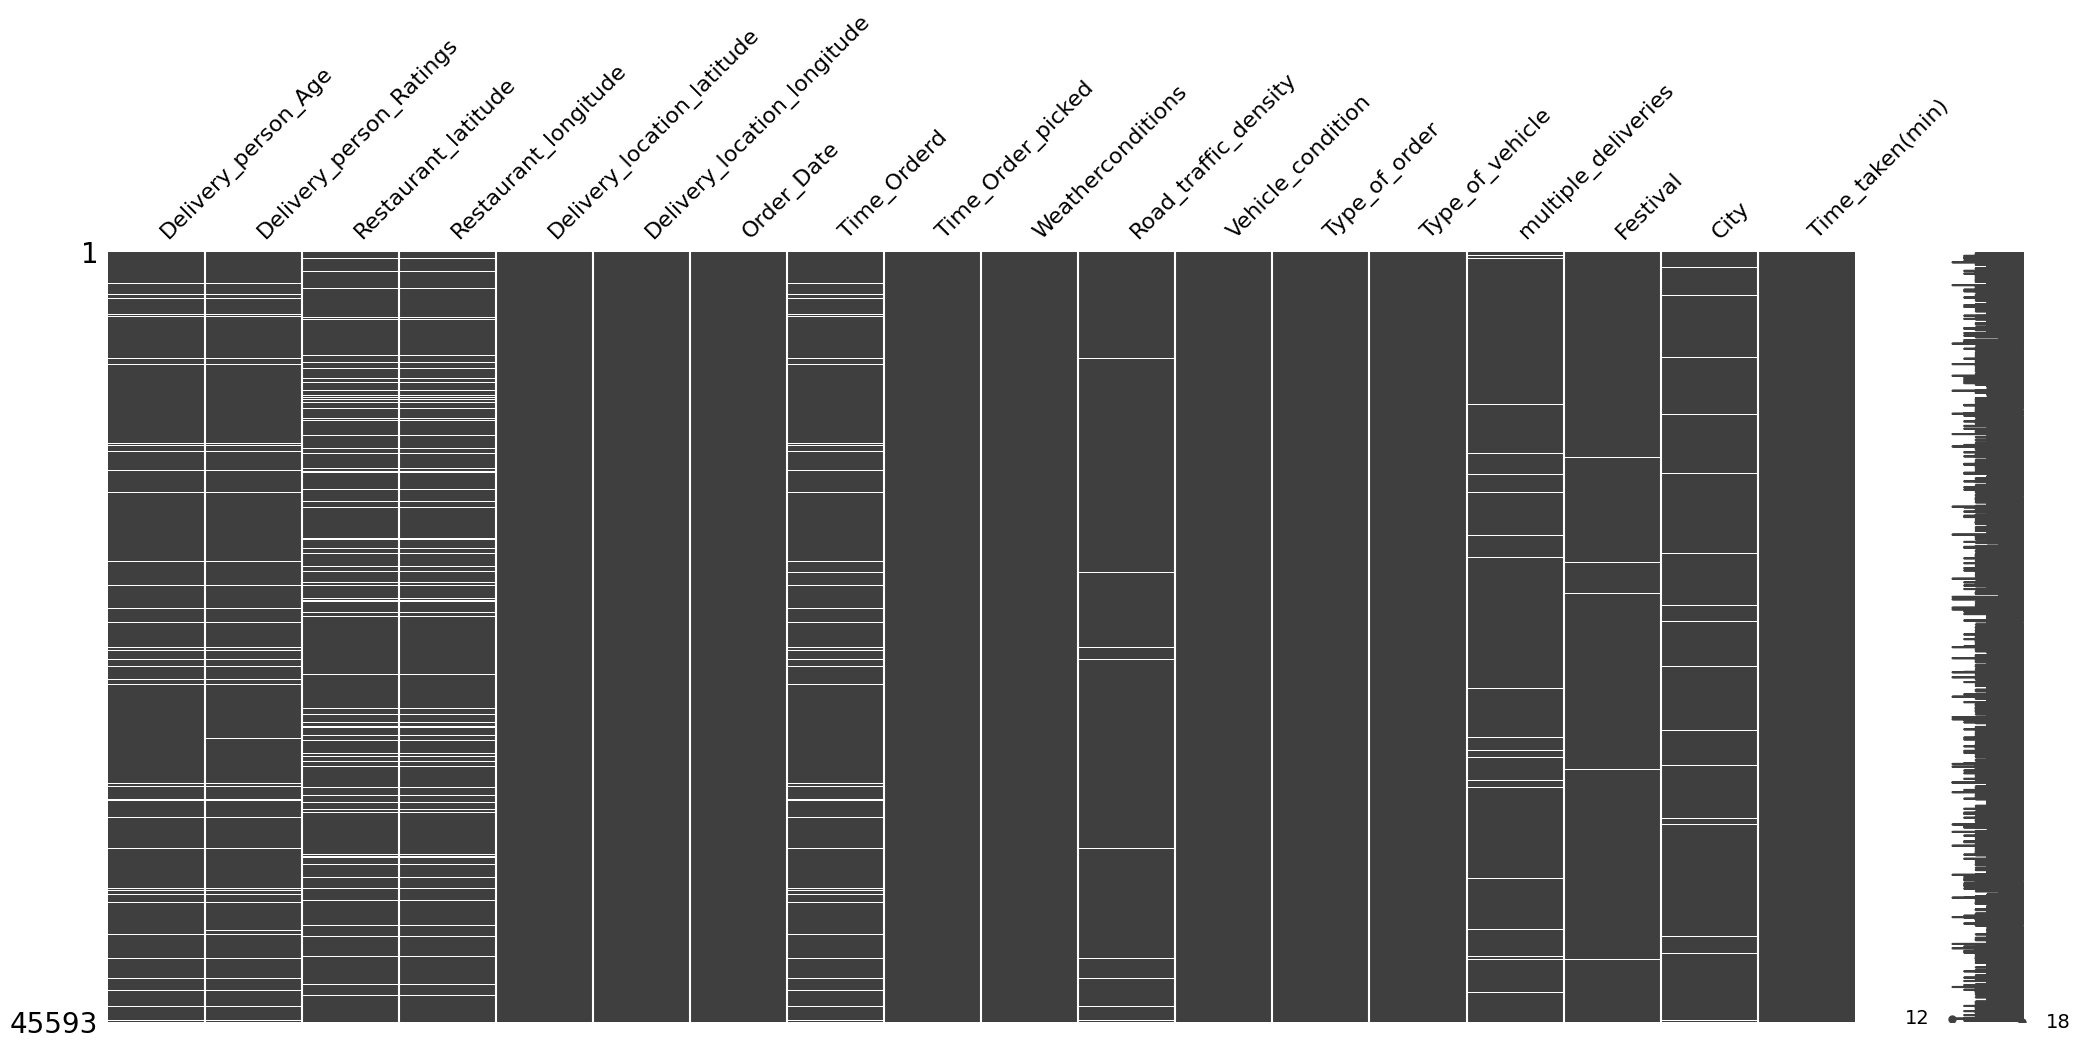

In [105]:
msno.matrix(data)

### Converting `Time_taken` into numeric type

In [106]:
# turn Time_taken into numeric
data["Time_taken(min)"] = data["Time_taken(min)"].str.extract('(\d+)')
data["Time_taken(min)"] = pd.to_numeric(data["Time_taken(min)"])
data["Time_taken(min)"].astype('int64')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_10052\607873164.py:2: SyntaxWarning: invalid escape sequence '\d'
  data["Time_taken(min)"] = data["Time_taken(min)"].str.extract('(\d+)')


0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

### Converting `Delivery_person_Ratings` into numeric type

In [107]:
data = data.loc[data['Delivery_person_Ratings'] != "NaN "]
data["Delivery_person_Ratings"] = pd.to_numeric(data["Delivery_person_Ratings"])
data["Delivery_person_Ratings"].astype('float64')
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


### Converting `multiple_deliveries` into numeric type

In [108]:
data['multiple_deliveries'].fillna(-1, inplace=True)
data["multiple_deliveries"] = pd.to_numeric(data["multiple_deliveries"])
data["multiple_deliveries"].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_10052\130699027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['multiple_deliveries'].fillna(-1, inplace=True)


0        0
1        1
2        1
3        1
4        1
        ..
45588    0
45589    1
45590    0
45591    1
45592    1
Name: multiple_deliveries, Length: 45593, dtype: int32

### Removing missing `Restaurant_latitude` and `Restaurant_longitude`

In [109]:
data = data[data['Restaurant_latitude'].notna()]
data = data[data['Restaurant_longitude'].notna()]

### Removing data entries with no `Time_Orderd`

In [110]:
data = data[data['Time_Orderd'].notna()]


In [111]:
data.shape      # just to be sure we did not drop the entire dataframe

(40353, 18)

In [112]:
data.isna().sum()

Delivery_person_Age             200
Delivery_person_Ratings         244
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                        206
City                           1059
Time_taken(min)                   0
dtype: int64

As seen from the output above there are still a handful of missing values on four of all columns. We will continue to clean those.

In [113]:
data['Festival'].unique()

array(['No ', 'Yes ', nan], dtype=object)

### Impute Mode into Festival

In [114]:
data['Festival'].describe()

count     40147
unique        2
top         No 
freq      39360
Name: Festival, dtype: object

In [115]:
data['Festival'].fillna('No ', inplace=True)
data['Festival'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_10052\842438036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Festival'].fillna('No ', inplace=True)


array(['No ', 'Yes '], dtype=object)

### Impute Mode into City

In [116]:
data['City'].unique()

array(['Urban ', 'Metropolitian ', nan, 'Semi-Urban '], dtype=object)

In [117]:
data['City'].describe()

count              39294
unique                 3
top       Metropolitian 
freq               30220
Name: City, dtype: object

In [118]:
data['City'].fillna('Metropolitian ', inplace=True)
data['City'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_10052\184588875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['City'].fillna('Metropolitian ', inplace=True)


array(['Urban ', 'Metropolitian ', 'Semi-Urban '], dtype=object)

In [119]:
data.shape

(40353, 18)

In [120]:
data.isnull().sum()

Delivery_person_Age            200
Delivery_person_Ratings        244
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken(min)                  0
dtype: int64

In [121]:
data['Delivery_person_Ratings'].describe()

count    40109.000000
mean         4.633987
std          0.314886
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: Delivery_person_Ratings, dtype: float64

### Impute `Delivery_person_Ratings` with its mean

In [122]:
data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10052\525286586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].mean(), inplace=True)


In [123]:
data.isnull().sum()

Delivery_person_Age            200
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken(min)                  0
dtype: int64

### Impute `Delivery_person_Age` with its median

In [124]:
data['Delivery_person_Age'].describe()

count     40153
unique       20
top          35
freq       2099
Name: Delivery_person_Age, dtype: object

In [125]:
data['Delivery_person_Age'] = pd.to_numeric(data["Delivery_person_Age"])
data['Delivery_person_Age'].median()

30.0

In [126]:
data['Delivery_person_Age'].fillna(data['Delivery_person_Age'].median(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10052\1419592336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Delivery_person_Age'].fillna(data['Delivery_person_Age'].median(),inplace=True)


### Rename Columns to Camel Case

Because their naming convention is ... quite unpleasant.

In [127]:
data = data.rename(columns={'Delivery_person_Age' : 'Age',
                            'Delivery_person_Ratings': 'Ratings',
                            'Restaurant_latitude': 'RestaurantLat',
                            'Restaurant_longitude': 'RestaurantLon',
                            'Delivery_location_latitude': 'DeliveryLocationLat',
                            'Delivery_location_longitude': 'DeliveryLocationLon',
                            'Time_Orderd': 'TimeOrdered',
                            'Time_Order_picked': 'TimeOrderPickedUp',
                            'Weatherconditions': 'WeatherConditions',
                            'Road_traffic_density': 'RoadTrafficDensity',
                            'Vehicle_condition': 'VehicleCondition',
                            'Type_of_order': 'TypeOfOrder',
                            'Type_of_vehicle': 'TypeOfVehicle',
                            'multiple_deliveries': 'MultipleDeliveries',
                            'Time_taken(min)': 'TimeTaken' ,
                            })

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40353 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  40353 non-null  float64
 1   Ratings              40353 non-null  float64
 2   RestaurantLat        40353 non-null  float64
 3   RestaurantLon        40353 non-null  float64
 4   DeliveryLocationLat  40353 non-null  float64
 5   DeliveryLocationLon  40353 non-null  float64
 6   Order_Date           40353 non-null  object 
 7   TimeOrdered          40353 non-null  object 
 8   TimeOrderPickedUp    40353 non-null  object 
 9   WeatherConditions    40353 non-null  object 
 10  RoadTrafficDensity   40353 non-null  object 
 11  VehicleCondition     40353 non-null  int64  
 12  TypeOfOrder          40353 non-null  object 
 13  TypeOfVehicle        40353 non-null  object 
 14  MultipleDeliveries   40353 non-null  int64  
 15  Festival             40353 non-null  obje

## Feature Engineering

### Distance:
Firstly: Based on the coordinates of the resturant and delivery location. We can use a function to determine the distance


In [129]:
def calcDistance(row):
    lat1 = np.radians(row["RestaurantLat"])
    lon1 = np.radians(row["RestaurantLon"])
    lat2 = np.radians(row["DeliveryLocationLat"])
    lon2 = np.radians(row["DeliveryLocationLon"])
    return np.arccos(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(lon2-lon1)) * 6371

In [130]:
data["Distance"] = data.apply(calcDistance, axis=1)

In [131]:
data["Distance"].describe()

count    40353.000000
mean        28.669572
std        315.930556
min          1.465067
25%          4.657673
50%          9.193521
75%         13.681492
max       6884.726399
Name: Distance, dtype: float64

We identify that there the max distance is 6884km which was not possible. So we tried to find extereme distances.

In [132]:
data.loc[data['Distance'] > 100]

,Age,Ratings,RestaurantLat,RestaurantLon,DeliveryLocationLat,DeliveryLocationLon,Order_Date,TimeOrdered,TimeOrderPickedUp,WeatherConditions,RoadTrafficDensity,VehicleCondition,TypeOfOrder,TypeOfVehicle,MultipleDeliveries,Festival,City,TimeTaken,Distance
92,34.0,4.7,-27.163303,78.057044,27.233303,78.127044,16-02-2022,23:00:00,23:05:00,conditions Sandstorms,Low,1,Drinks,scooter,0,No,Metropolitian,15,6048.631240
283,32.0,4.7,-27.165108,78.015053,27.225108,78.075053,13-02-2022,20:55:00,21:10:00,conditions Sandstorms,Jam,2,Meal,scooter,1,No,Metropolitian,31,6047.919478
1091,20.0,4.7,-15.546594,73.760431,15.606594,73.820431,13-02-2022,20:00:00,20:10:00,conditions Cloudy,Jam,2,Drinks,motorcycle,1,No,Metropolitian,29,3464.082720
1783,39.0,4.5,-23.230791,77.437020,23.250791,77.457020,13-02-2022,09:15:00,09:20:00,conditions Cloudy,Low,0,Meal,motorcycle,1,No,Metropolitian,29,5168.516553
1976,25.0,4.0,-22.539129,88.365507,22.549129,88.375507,15-02-2022,09:25:00,09:30:00,conditions Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,19,5013.585658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43860,32.0,4.6,-15.498603,73.826911,15.568603,73.896911,18-02-2022,23:10:00,23:15:00,conditions Sandstorms,Low,0,Snack,motorcycle,1,No,Metropolitian,24,3454.524245
44051,22.0,5.0,-15.157944,73.950889,15.217944,74.010889,17-02-2022,18:50:00,18:55:00,conditions Sandstorms,Medium,1,Buffet,scooter,1,No,Metropolitian,27,3377.651072
44640,23.0,4.8,-9.982834,76.283268,10.072834,76.373268,14-02-2022,19:20:00,19:35:00,conditions Sunny,Jam,0,Drinks,motorcycle,1,No,Metropolitian,21,2230.110757
44933,30.0,4.9,-19.874733,75.353942,19.904733,75.383942,15-02-2022,22:20:00,22:35:00,conditions Fog,Low,1,Buffet,motorcycle,0,No,Metropolitian,15,4423.276011


We identified that the `RestaurantLat` was negative. Since the data was collected from India, where coordinate values should be positive (`6.00 <= Lat <= 33.5, 68.00 <= Lon <= 98.00`), we inferred that they could have been mistaken. Therefore, we changed it to postive and recalculated the distance.

In [133]:
data.query(
    "RestaurantLat >= 33.5 or RestaurantLat <= 6.00 or RestaurantLon <= 68.00 or RestaurantLon >= 98.00"
).describe()    # look at RestaurantLat. They are all negative.

,Age,Ratings,RestaurantLat,RestaurantLon,DeliveryLocationLat,DeliveryLocationLon,VehicleCondition,MultipleDeliveries,TimeTaken,Distance
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,29.615385,4.629935,-22.057652,79.023193,22.119575,79.085116,1.051282,0.730769,25.083333,4912.290324
std,5.503619,0.301779,6.165278,4.824553,6.164794,4.821753,0.840851,0.560485,8.486010,1371.032845
min,20.000000,3.400000,-30.902872,73.742294,9.969778,73.769478,0.000000,-1.000000,10.000000,2216.065794
25%,25.000000,4.600000,-26.474346,75.372353,19.885254,75.502353,0.000000,0.000000,19.000000,4421.166849
50%,30.000000,4.700000,-22.552040,77.429917,22.621559,77.488536,1.000000,1.000000,25.000000,5021.474291
75%,34.000000,4.800000,-19.872579,80.354002,26.551533,80.464002,2.000000,1.000000,30.250000,5895.928471
max,39.000000,5.000000,-9.959778,88.433452,31.012872,88.523452,2.000000,3.000000,51.000000,6884.726399


In [134]:
data.loc[data['Distance'] > 100, 'RestaurantLat'] *= -1     # roughly, filter out all unreasonable distances

In [135]:
data["Distance"] = data.apply(calcDistance, axis=1)
data['Distance'].describe()

count    40353.000000
mean         9.715430
std          5.597583
min          1.465067
25%          4.657655
50%          9.193014
75%         13.631449
max         20.969489
Name: Distance, dtype: float64

Now, the `Distance` looks more reasonable.

### Order_Date:
In order to use this in a more useful way, we converted it to the day of the week instead.

In [136]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d-%m-%Y')

In [137]:
data['Day'] = data['Order_Date'].dt.day_name()

In [138]:
data = data.drop('Order_Date', axis=1)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40353 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  40353 non-null  float64
 1   Ratings              40353 non-null  float64
 2   RestaurantLat        40353 non-null  float64
 3   RestaurantLon        40353 non-null  float64
 4   DeliveryLocationLat  40353 non-null  float64
 5   DeliveryLocationLon  40353 non-null  float64
 6   TimeOrdered          40353 non-null  object 
 7   TimeOrderPickedUp    40353 non-null  object 
 8   WeatherConditions    40353 non-null  object 
 9   RoadTrafficDensity   40353 non-null  object 
 10  VehicleCondition     40353 non-null  int64  
 11  TypeOfOrder          40353 non-null  object 
 12  TypeOfVehicle        40353 non-null  object 
 13  MultipleDeliveries   40353 non-null  int64  
 14  Festival             40353 non-null  object 
 15  City                 40353 non-null  obje

In [140]:
data['Day'].unique()

array(['Saturday', 'Friday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday',
       'Thursday'], dtype=object)

### TimeOrdered:
To better make use of these data, we created a new column with the hour instead.

In [141]:
data['TimeOrdered'] = pd.to_datetime(data['TimeOrdered'], format='%H:%M:%S')

In [142]:
data['Hour'] = data['TimeOrdered'].dt.hour


In [143]:
data = data.drop('TimeOrdered', axis=1)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40353 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  40353 non-null  float64
 1   Ratings              40353 non-null  float64
 2   RestaurantLat        40353 non-null  float64
 3   RestaurantLon        40353 non-null  float64
 4   DeliveryLocationLat  40353 non-null  float64
 5   DeliveryLocationLon  40353 non-null  float64
 6   TimeOrderPickedUp    40353 non-null  object 
 7   WeatherConditions    40353 non-null  object 
 8   RoadTrafficDensity   40353 non-null  object 
 9   VehicleCondition     40353 non-null  int64  
 10  TypeOfOrder          40353 non-null  object 
 11  TypeOfVehicle        40353 non-null  object 
 12  MultipleDeliveries   40353 non-null  int64  
 13  Festival             40353 non-null  object 
 14  City                 40353 non-null  object 
 15  TimeTaken            40353 non-null  int6

In [145]:
data.to_csv(r'train_cleaned.csv', index=False)